# Predictive Model Building for Retail Dataset

## 0. Business Problem

<img src="images/Retail_store1.png" style="width:400px;height:200px;">

For a Retail giant, the location of a retail store plays a huge role in its commercial success.  
The Team is planning to open some new stores across the country. But they are not sure which locations are the best to choose.   

Can we help them on choosing the best suitable locations ?

Constraint: Budget. Can afford opening 3 new stores.

## 1. Machine Learning Problem

#### With the help of Data and applying machine learning techniques can we predict the best suited locations ?



#### To open a store, which KPI we will consider to justify the business relevance?

**Sales / Revenue**

<img src="images/dollar_sales_profit.png" style="width:400px;height:200px;">

So, with all our knowledge, **can we predict Sales ?**

If yes, then we may suggest the best 3 store locations which are going to have Higher Sales or make more revenue, so that we get our ROI in a longer run.

## 2. Data Gathering

<img src="images/Gathering_Data.png" style="width:400px;height:200px;">

* 1. Population the area ?   


* 2. Public Transport Availability ?


* 3. Competitor Density ?


* 4. Property Value ?


* 5. Crime Rate ?

Dataset files
* `train.csv`
* `test.csv`


* `crime_rate`: crime rate in the area (higher means more crime)
* `household_size`: mean household size in the area
* `household_affluency`: mean household affluency in the area (higher means more affluent)
* `public_transport_dist`: index of public transport availability in the area
* `proportion_newbuilds`: proportion of newly built property in the area
* `property_value`: average property value in the area
* `commercial_property`: percentage of commercial properties in the area
* `school_proximity`: average school proximity in the area
* `transport_availability`: availability of different transport
* `new_store`: new store opened recently
* `proportion_nonretail`: proportion of non-retail commercial properties in the area
* `competitor_density`: density of competitor retailers
* `proportion_flats`: proportion of blocks of flats in the area

#### Python Library & Package

In [1]:
# Basic numerical and other libraries
import random
import numpy as np
import pandas as pd
from scipy import stats
import sys
import functools

# Display option
from IPython.display import display, HTML
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 5000

# Handle warnings (during execution of code)
import warnings
warnings.filterwarnings('ignore')

# Datetime
import time
from datetime import datetime
from datetime import timedelta

# Visulisation
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# statsmodel
import statsmodels.api as statsm
import statsmodels.discrete.discrete_model as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn
from sklearn.model_selection import StratifiedKFold, KFold, LeaveOneOut, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import tree
# tensorflow

# Save Model
import pickle
from sklearn.externals import joblib


C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


#### User-Defined Functions

In [2]:
#  Evaluate Random Search

def evaluate(model, test_features, test_labels):
    '''
    Function Output: 
    1. Accuracy %
    2. Error: MAPE
    '''
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * abs(np.mean(errors / test_labels))
    accuracy = 100 - mape
    print('Model Performance:')
    print('--'*5)
    print('--'*5)
#     print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    print(f'Error: {np.round(mape,2)}%')
    
    return accuracy

#### Import Datasets into Python Notebook

In [3]:
# Training Dataset
df_train = pd.read_csv('train.csv')

In [4]:
# Test Dataset
df_test = pd.read_csv('test.csv')

## 3. Exploratory Data Analysis (EDA)

<img src="images/EDA.png" style="width:400px;height:200px;">

* How do the datasets look like ?

In [5]:
# Number of rows and Number of Columns in the dataset
print(df_train.shape)


(320, 16)


In [6]:
# Let's see how does the dataframe look like ?
df_train.head(5)

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
0,464,17.600541,0.0,18.10,no,NaN,2.926,29.0,2.9084,All transport options,666,20.2,368.74,4.5325,-0.399933,c_40
1,504,0.603556,20.0,3.97,no,14.85,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80
2,295,0.606810,0.0,6.20,no,7.70,2.981,31.9,3.6715,Many transport options,307,17.4,378.35,2.9125,0.166920,c_53
3,187,0.012385,55.0,2.25,no,1.95,3.453,68.1,7.3073,No transport options,300,15.3,394.72,2.0575,-0.083804,c_65
4,193,0.016182,100.0,1.32,no,3.05,3.816,59.5,8.3248,Average transport options,256,15.1,392.90,0.9875,0.962693,c_97


In [7]:
# Number of rows and Number of Columns in the dataset
print(df_test.shape)


(13, 15)


In [8]:
# Let's see how does the dataframe look like ?
df_test.head(5)

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,county
0,105,0.039968,34.0,6.09,no,4.15,3.590,59.6,5.4917,Many transport options,329,16.1,395.75,2.3750,c_42
1,400,0.587758,20.0,3.97,no,14.85,5.398,8.5,2.2885,Average transport options,264,13.0,386.86,1.4775,c_140
2,338,1.116926,0.0,8.14,no,9.40,2.813,0.0,4.0952,Few transport options,307,NaN,394.54,4.9700,c_55
3,227,1.517409,0.0,19.58,no,12.75,3.066,0.0,1.7573,Average transport options,403,14.7,353.89,1.6075,c_62
4,114,83.093533,0.0,18.10,no,16.45,2.957,0.0,1.8026,All transport options,666,20.2,16.45,5.1550,c_22


### Data Quality Check

In [9]:
# Numeric summary
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
location_id,320.0,252.387500,145.600582,1.000000,126.500000,251.500000,377.250000,506.000000
crime_rate,320.0,3.596375,7.176342,0.007142,0.087937,0.289681,4.063553,51.693093
proportion_flats,320.0,10.673438,22.579232,0.000000,0.000000,0.000000,12.500000,100.000000
proportion_nonretail,320.0,11.307906,7.032693,0.740000,5.130000,9.900000,18.100000,27.740000
commercial_property,291.0,16.868557,73.806051,1.750000,5.450000,9.400000,14.050000,1009.000000
household_size,320.0,3.252803,0.695442,0.561000,2.879750,3.197500,3.597250,5.725000
proportion_newbuilds,320.0,31.849063,27.845777,0.000000,6.350000,23.400000,54.450000,94.000000
public_transport_dist,320.0,3.718765,1.984765,1.137000,2.138075,3.095750,5.116700,10.710300
property_value,320.0,408.834375,170.888974,188.000000,277.000000,330.000000,666.000000,711.000000
school_proximity,257.0,18.589494,2.075529,13.000000,17.400000,19.100000,20.200000,21.200000


In [10]:
# Data types
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
location_id               320 non-null int64
crime_rate                320 non-null float64
proportion_flats          320 non-null float64
proportion_nonretail      320 non-null float64
new_store                 320 non-null object
commercial_property       291 non-null float64
household_size            320 non-null float64
proportion_newbuilds      320 non-null float64
public_transport_dist     320 non-null float64
transport_availability    320 non-null object
property_value            320 non-null int64
school_proximity          257 non-null float64
competitor_density        320 non-null float64
household_affluency       320 non-null float64
normalised_sales          320 non-null float64
county                    320 non-null object
dtypes: float64(11), int64(2), object(3)
memory usage: 40.1+ KB
None


* It seems the below 3 features are categorical.
     1. new_store
     2. transport_availability
     3. county

* Duplicate Check

In [11]:
print(f'There are {df_train.shape[0] - df_train.location_id.nunique()} duplicates for location id')

There are 0 duplicates for location id


### Missing Value Analysis

In [12]:
# Calculate missing value count and percentage

missing_value_df_train = pd.DataFrame(index = df_train.keys(),data =df_train.isnull().sum(),columns = ['Missing_Value_Count'])
missing_value_df_train['Missing_Value_Percentage'] = ((df_train.isnull().mean())*100)
missing_value_df_train.sort_values('Missing_Value_Count',ascending= False)

,Missing_Value_Count,Missing_Value_Percentage
school_proximity,63,19.6875
commercial_property,29,9.0625
location_id,0,0.0000
crime_rate,0,0.0000
proportion_flats,0,0.0000
proportion_nonretail,0,0.0000
new_store,0,0.0000
household_size,0,0.0000
proportion_newbuilds,0,0.0000
public_transport_dist,0,0.0000


* Below 2 features only are having missing values

    **1. commercial_property**   
    **2. school_proximity**
    
    
* Both the features are having missing values less than 20%. We may impute these.

##### Outlier Analysis for Categorical Features

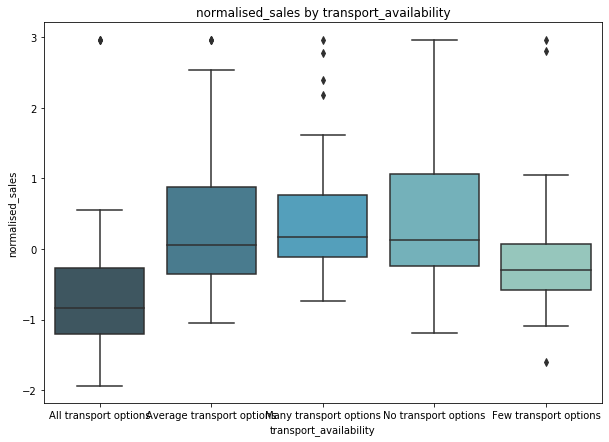

In [13]:
# normalised_sales by transport_availability
plt.figure(figsize = (10,7))
sns.boxplot(x = 'transport_availability', y = 'normalised_sales', data = df_train, palette= 'GnBu_d').set_title('normalised_sales by transport_availability')
plt.show()

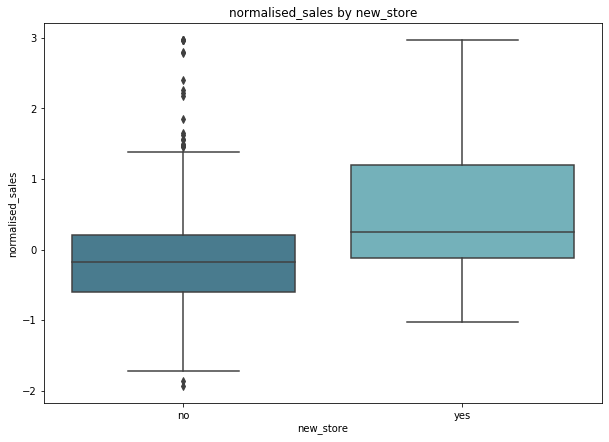

In [14]:
# normalised_sales by new_store
plt.figure(figsize = (10,7))
sns.boxplot(x = 'new_store', y = 'normalised_sales', data = df_train, palette= 'GnBu_d').set_title('normalised_sales by new_store')
plt.show()

### Feature Analysis

#### crime_rate

In [15]:
# Range of crime_rate
print(df_train['crime_rate'].min())
print(df_train['crime_rate'].max())

0.0071416
51.69309299999999


(array([250.,  30.,  19.,   9.,   4.,   4.,   1.,   0.,   2.,   1.]),
 array([7.14160000e-03, 5.17573674e+00, 1.03443319e+01, 1.55129270e+01,
        2.06815222e+01, 2.58501173e+01, 3.10187124e+01, 3.61873076e+01,
        4.13559027e+01, 4.65244979e+01, 5.16930930e+01]),
 <a list of 10 Patch objects>)

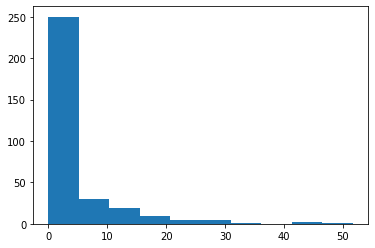

In [16]:
# Histogram
plt.hist(df_train['crime_rate'])

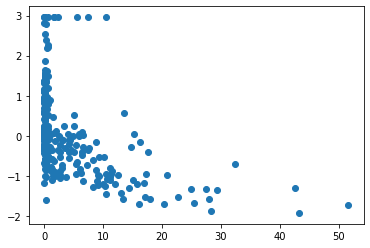

In [17]:
# Scatter plot for crime_rate vs normalised_sales
plt.scatter(df_train['crime_rate'], df_train['normalised_sales'])

(array([2., 6., 3., 5., 3., 0., 1., 1., 0., 2.]),
 array([-1.93697397, -1.73966582, -1.54235767, -1.34504952, -1.14774137,
        -0.95043322, -0.75312507, -0.55581692, -0.35850877, -0.16120062,
         0.03610753]),
 <a list of 10 Patch objects>)

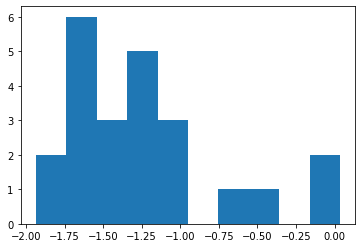

In [18]:
# crime_rate_gt_10 = df_train[df_train['crime_rate']>=10]
plt.hist(df_train[df_train['crime_rate']>15]['normalised_sales'])

In [19]:
df_train[(df_train['crime_rate']>15)&(df_train['normalised_sales']>=0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
151,434,15.280086,0.0,18.1,no,14.05,0.863,0.0,1.5106,All transport options,666,NaN,131.42,3.3325,0.036108,c_72


* High crime_rate results in less sales
* Only 1 store having positive sales figure having crime_rate > 15. 
* Sales is also less than the median of normalised sales i.e. 0.5.

#### proportion_flats

In [20]:
# Range of proportion_flats
print(df_train['proportion_flats'].min())
print(df_train['proportion_flats'].max())

0.0
100.0


(array([238.,   8.,  32.,   9.,   7.,   4.,   3.,   3.,  10.,   6.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

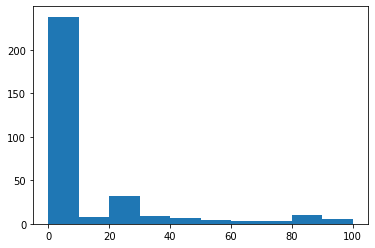

In [21]:
# Histogram
plt.hist(df_train['proportion_flats'])

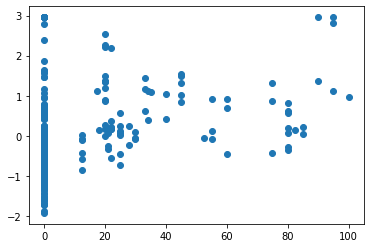

In [22]:
# Scatter plot for proportion_flats vs normalised_sales
plt.scatter(df_train['proportion_flats'], df_train['normalised_sales'])

* Can't infer much from proportion_flats

#### proportion_nonretail

In [23]:
# Range of proportion_nonretail
print(df_train['proportion_nonretail'].min())
print(df_train['proportion_nonretail'].max())

0.74
27.74


(array([ 49.,  56.,  50.,  27.,  12.,   2., 104.,  10.,   0.,  10.]),
 array([ 0.74,  3.44,  6.14,  8.84, 11.54, 14.24, 16.94, 19.64, 22.34,
        25.04, 27.74]),
 <a list of 10 Patch objects>)

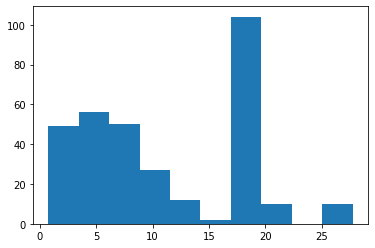

In [24]:
# Histogram
plt.hist(df_train['proportion_nonretail'])

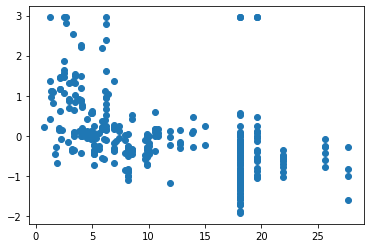

In [25]:
# Scatter plot for proportion_nonretail vs normalised_sales
plt.scatter(df_train['proportion_nonretail'], df_train['normalised_sales'])

(array([1., 0., 0., 2., 1., 4., 4., 3., 4., 1.]),
 array([-1.59904288, -1.44751895, -1.29599501, -1.14447107, -0.99294713,
        -0.84142319, -0.68989926, -0.53837532, -0.38685138, -0.23532744,
        -0.0838035 ]),
 <a list of 10 Patch objects>)

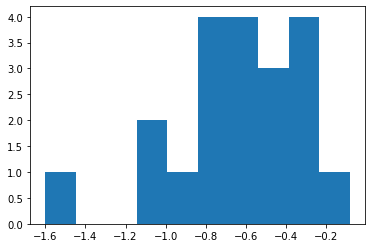

In [26]:
# proportion_nonretail_gt_20 = df_train[df_train['proportion_nonretail']>=20]
plt.hist(df_train[df_train['proportion_nonretail']>20]['normalised_sales'])

In [27]:
df_train[(df_train['proportion_nonretail']>20)&(df_train['normalised_sales']>=0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county


* High proportion_nonretail results in low sales
* proportion_nonretail >20 -> sales in negative

#### commercial_property

In [28]:
# Range of commercial_property
print(df_train['commercial_property'].min())
print(df_train['commercial_property'].max())

1.7500000000000016
1009.0


(array([288.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([   1.75 ,  102.475,  203.2  ,  303.925,  404.65 ,  505.375,
         606.1  ,  706.825,  807.55 ,  908.275, 1009.   ]),
 <a list of 10 Patch objects>)

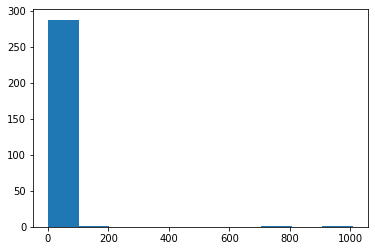

In [29]:
# Histogram
plt.hist(df_train['commercial_property'])

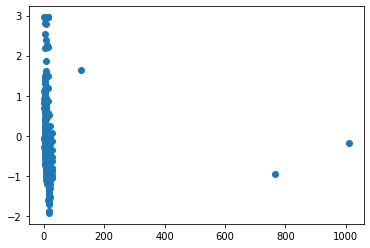

In [30]:
# Scatter plot for commercial_property vs normalised_sales
plt.scatter(df_train['commercial_property'], df_train['normalised_sales'])

* Can't infer much from commercial_property

#### household_size

In [31]:
# Range of household_size
print(df_train['household_size'].min())
print(df_train['household_size'].max())

0.5610000000000004
5.725


(array([  2.,   3.,  10.,  29., 103., 104.,  42.,  15.,   7.,   5.]),
 array([0.561 , 1.0774, 1.5938, 2.1102, 2.6266, 3.143 , 3.6594, 4.1758,
        4.6922, 5.2086, 5.725 ]),
 <a list of 10 Patch objects>)

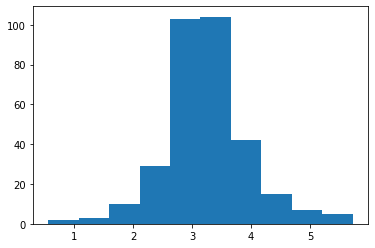

In [32]:
# Histogram
plt.hist(df_train['household_size'])

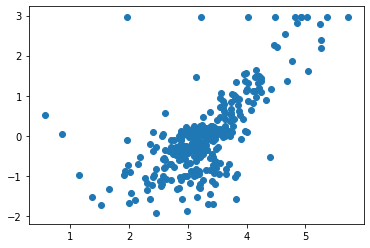

In [33]:
# Scatter plot for household_size vs normalised_sales
plt.scatter(df_train['household_size'], df_train['normalised_sales'])

(array([ 1.,  1.,  0.,  2.,  8.,  8.,  3.,  3.,  2., 10.]),
 array([-0.54164562, -0.19063333,  0.16037896,  0.51139124,  0.86240353,
         1.21341582,  1.56442811,  1.9154404 ,  2.26645268,  2.61746497,
         2.96847726]),
 <a list of 10 Patch objects>)

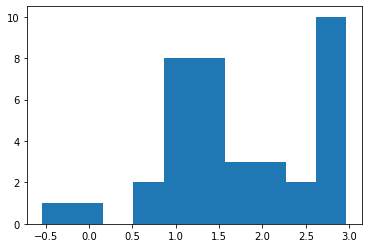

In [34]:
# household_size >= 4
plt.hist(df_train[df_train['household_size']>=4]['normalised_sales'])

In [35]:
df_train[(df_train['household_size']>=4)&(df_train['normalised_sales']<0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
212,328,9.320342,0.0,18.1,no,18.15,4.393,0.7,2.4527,All transport options,666,20.2,375.87,4.185,-0.541646,c_60


* More household_size results in more sales
* household_size >=4 -> sales in positive

#### proportion_newbuilds

In [36]:
# Range of proportion_newbuilds
print(df_train['proportion_newbuilds'].min())
print(df_train['proportion_newbuilds'].max())

0.0
94.0


(array([102.,  42.,  29.,  24.,  23.,  24.,  22.,  24.,  18.,  12.]),
 array([ 0. ,  9.4, 18.8, 28.2, 37.6, 47. , 56.4, 65.8, 75.2, 84.6, 94. ]),
 <a list of 10 Patch objects>)

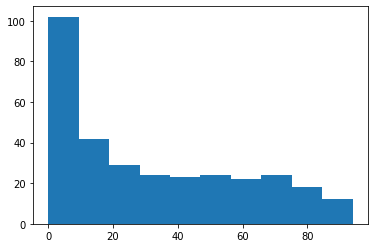

In [37]:
# Histogram
plt.hist(df_train['proportion_newbuilds'])

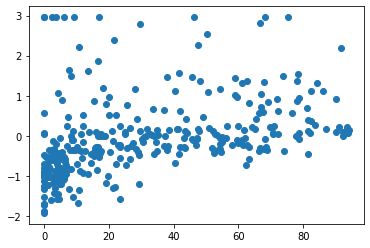

In [38]:
# Scatter plot for proportion_newbuilds vs normalised_sales
plt.scatter(df_train['proportion_newbuilds'], df_train['normalised_sales'])

(array([ 2., 18.,  5.,  4.,  4.,  4.,  0.,  1.,  0.,  1.]),
 array([-0.4544376 , -0.11214611,  0.23014537,  0.57243686,  0.91472835,
         1.25701983,  1.59931132,  1.9416028 ,  2.28389429,  2.62618577,
         2.96847726]),
 <a list of 10 Patch objects>)

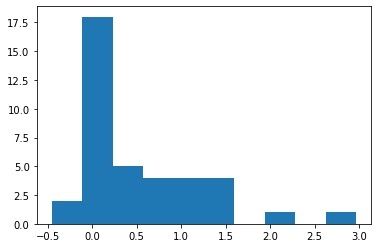

In [39]:
# proportion_newbuilds >= 70
plt.hist(df_train[df_train['proportion_newbuilds']>=70]['normalised_sales'])

In [40]:
df_train[(df_train['proportion_newbuilds']>=70)&(df_train['normalised_sales']<0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
130,356,0.081857,60.0,1.69,no,3.05,2.884,81.5,10.7103,Few transport options,411,18.3,392.33,1.9475,-0.454438,c_57
134,231,0.074772,0.0,3.24,no,NaN,2.868,74.2,5.2146,Few transport options,430,NaN,382.44,2.4925,-0.378131,c_61
274,309,0.065416,12.5,6.07,no,2.95,2.878,78.6,6.4980,Few transport options,345,NaN,396.21,2.0250,-0.083804,c_43
310,289,0.154155,0.0,10.59,no,6.95,2.891,77.7,3.9454,Few transport options,277,18.6,396.90,2.7175,-0.018397,c_46


* More proportion_newbuilds results in more sales
* proportion_newbuilds >=70 -> sales in positive

#### public_transport_dist

In [41]:
# Range of public_transport_dist
print(df_train['public_transport_dist'].min())
print(df_train['public_transport_dist'].max())

1.137
10.7103


(array([74., 84., 46., 32., 31., 26., 14.,  8.,  4.,  1.]),
 array([ 1.137  ,  2.09433,  3.05166,  4.00899,  4.96632,  5.92365,
         6.88098,  7.83831,  8.79564,  9.75297, 10.7103 ]),
 <a list of 10 Patch objects>)

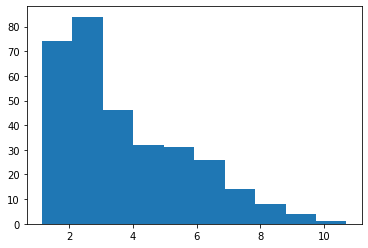

In [42]:
# Histogram
plt.hist(df_train['public_transport_dist'])

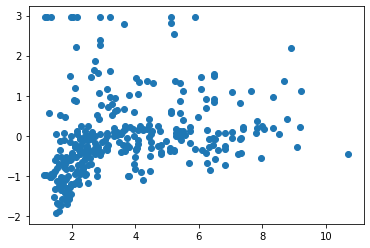

In [43]:
# Scatter plot for public_transport_dist vs normalised_sales
plt.scatter(df_train['public_transport_dist'], df_train['normalised_sales'])

(array([12., 24., 16.,  5.,  3.,  2.,  0.,  1.,  0.,  4.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

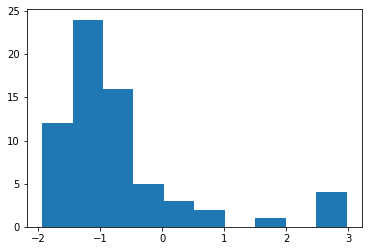

In [44]:
# public_transport_dist <2
plt.hist(df_train[df_train['public_transport_dist']<2]['normalised_sales'])

In [45]:
print(df_train[(df_train['public_transport_dist']<2)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['public_transport_dist']<2)&(df_train['normalised_sales']<0)].shape[0])

11
56


* Majority of low sales are due to poor index of public_transport_dist
* public_transport_dist <2 -> sales in negative

#### property_value

In [46]:
# Range of property_value
print(df_train['property_value'].min())
print(df_train['property_value'].max())

188
711


(array([40., 57., 68., 16., 50.,  1.,  0.,  0.,  0., 88.]),
 array([188. , 240.3, 292.6, 344.9, 397.2, 449.5, 501.8, 554.1, 606.4,
        658.7, 711. ]),
 <a list of 10 Patch objects>)

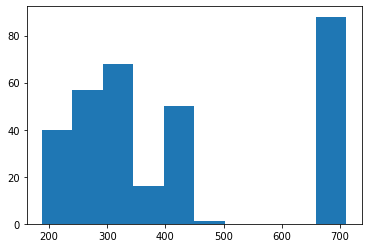

In [47]:
# Histogram
plt.hist(df_train['property_value'])

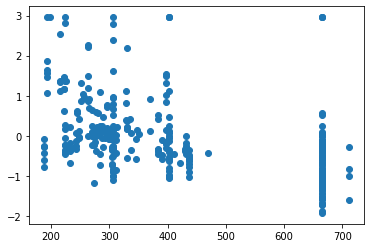

In [48]:
# Scatter plot for property_value vs normalised_sales
plt.scatter(df_train['property_value'], df_train['normalised_sales'])

(array([12., 26., 18., 22.,  5.,  2.,  0.,  0.,  0.,  3.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

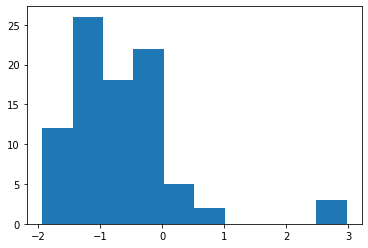

In [49]:
# property_value >500
plt.hist(df_train[df_train['property_value']>600]['normalised_sales'])

In [50]:
print(df_train[(df_train['property_value']>650)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['property_value']>650)&(df_train['normalised_sales']<0)].shape[0])

11
77


* Higher property_value results in low sales
* property_value >650 -> sales in negative

#### school_proximity

In [51]:
# Range of school_proximity
print(df_train['school_proximity'].min())
print(df_train['school_proximity'].max())

13.0
21.2


(array([ 7.,  0., 25., 10., 16., 29., 33., 21., 87., 29.]),
 array([13.  , 13.82, 14.64, 15.46, 16.28, 17.1 , 17.92, 18.74, 19.56,
        20.38, 21.2 ]),
 <a list of 10 Patch objects>)

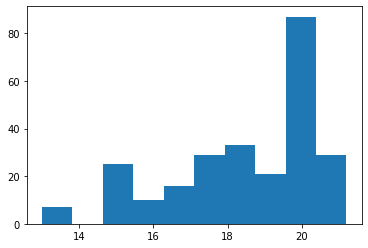

In [52]:
# Histogram
plt.hist(df_train['school_proximity'])

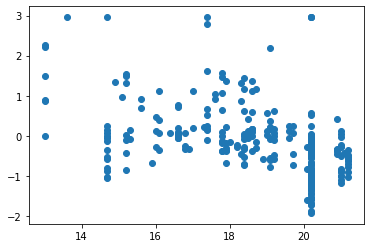

In [53]:
# Scatter plot for school_proximity vs normalised_sales
plt.scatter(df_train['school_proximity'], df_train['normalised_sales'])

(array([12., 24., 16.,  5.,  3.,  2.,  0.,  1.,  0.,  4.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

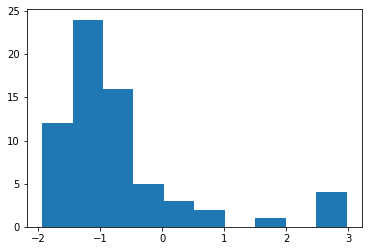

In [54]:
# public_transport_dist <2
plt.hist(df_train[df_train['public_transport_dist']<2]['normalised_sales'])

In [55]:
print(df_train[(df_train['school_proximity']<14)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['school_proximity']<14)&(df_train['normalised_sales']<0)].shape[0])

7
0


In [56]:
df_train[(df_train['school_proximity']<14)&(df_train['normalised_sales']>0)]

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
1,504,0.603556,20.0,3.97,no,14.85,4.520,10.6,2.1398,Average transport options,264,13.0,388.37,1.8150,2.216308,c_80
167,156,0.610765,20.0,3.97,no,11.25,4.470,47.4,2.8720,Average transport options,264,13.0,390.30,0.7900,2.259912,c_80
206,204,0.932544,20.0,3.97,no,NaN,4.327,5.5,2.0788,Average transport options,264,13.0,393.42,2.8125,0.897287,c_71
264,263,0.887841,20.0,3.97,no,14.85,4.014,15.4,2.1329,Average transport options,264,13.0,384.07,3.6975,0.864584,c_63
303,96,0.016961,90.0,1.21,yes,2.55,4.923,75.2,5.8850,No transport options,198,13.6,395.52,0.7900,2.968477,c_128
304,449,0.860631,20.0,3.97,no,14.85,2.560,37.2,1.9865,Average transport options,264,13.0,392.40,2.6125,0.003405,c_58
316,24,0.621579,20.0,3.97,no,14.85,4.206,8.4,1.9301,Average transport options,264,13.0,387.89,2.0250,1.496842,c_99


* All the low school_proximity having better sales  (Do not recommend strongly, need in-depth analysis with more granular data)
* school_proximity <14 -> sales in positive

#### competitor_density

In [57]:
# Range of competitor_density
print(df_train['competitor_density'].min())
print(df_train['competitor_density'].max())

3.5
396.9


(array([  7.,   6.,   6.,   2.,   1.,   2.,   7.,   6.,  19., 264.]),
 array([  3.5 ,  42.84,  82.18, 121.52, 160.86, 200.2 , 239.54, 278.88,
        318.22, 357.56, 396.9 ]),
 <a list of 10 Patch objects>)

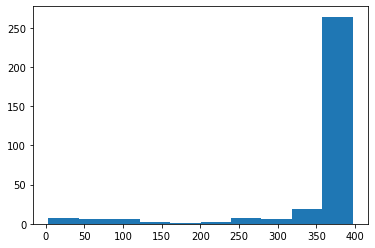

In [58]:
# Histogram
plt.hist(df_train['competitor_density'])

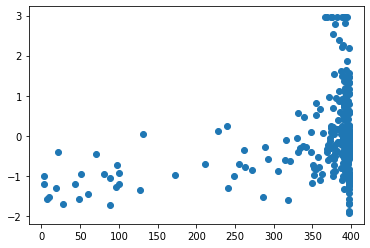

In [59]:
# Scatter plot for competitor_density vs normalised_sales
plt.scatter(df_train['competitor_density'], df_train['normalised_sales'])

In [60]:
print(df_train[(df_train['competitor_density']<350)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['competitor_density']<350)&(df_train['normalised_sales']<0)].shape[0])

6
43


* Low competitor_density results in less sales (This feature might not hold true, need multiple feature analysis.)
* competitor_density <350 -> sales in negative

#### household_affluency

In [61]:
# Range of household_affluency
print(df_train['household_affluency'].min())
print(df_train['household_affluency'].max())

0.4325
9.4925


(array([45., 69., 68., 56., 35., 17., 15., 10.,  1.,  4.]),
 array([0.4325, 1.3385, 2.2445, 3.1505, 4.0565, 4.9625, 5.8685, 6.7745,
        7.6805, 8.5865, 9.4925]),
 <a list of 10 Patch objects>)

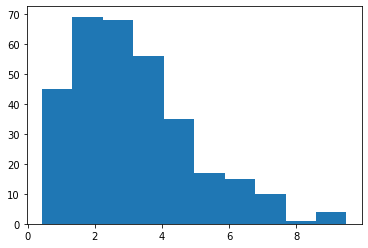

In [62]:
# Histogram
plt.hist(df_train['household_affluency'])

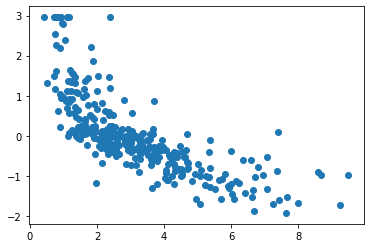

In [63]:
# Scatter plot for household_affluency vs normalised_sales
plt.scatter(df_train['household_affluency'], df_train['normalised_sales'])

(array([ 6.,  8., 17., 28., 27., 36., 16.,  8.,  1.,  1.]),
 array([-1.93697397, -1.6568182 , -1.37666243, -1.09650666, -0.81635089,
        -0.53619512, -0.25603935,  0.02411642,  0.30427219,  0.58442796,
         0.86458373]),
 <a list of 10 Patch objects>)

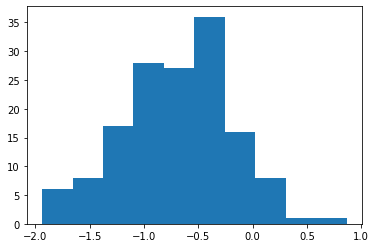

In [64]:
# household_affluency >=3
plt.hist(df_train[df_train['household_affluency']>=3]['normalised_sales'])

In [65]:
print(df_train[(df_train['household_affluency']>=3)&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['household_affluency']>=3)&(df_train['normalised_sales']<0)].shape[0])

11
137


* Higher household_affluency results in lower sales and vice-versa
* Linear relationship between household_affluency and normalised_sales (scatter plot)
* household_affluency >=3 -> sales in negative

#### normalised_sales

In [66]:
print(df_train['normalised_sales'].min())
print(df_train['normalised_sales'].max())

-1.9369739683900924
2.9684772596520763


(array([12., 34., 49., 99., 58., 25., 20.,  6.,  4., 13.]),
 array([-1.93697397, -1.44642885, -0.95588372, -0.4653386 ,  0.02520652,
         0.51575165,  1.00629677,  1.49684189,  1.98738701,  2.47793214,
         2.96847726]),
 <a list of 10 Patch objects>)

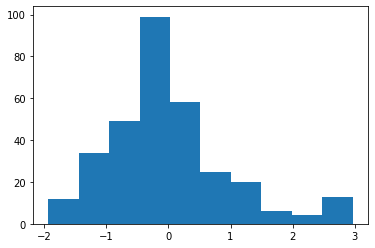

In [67]:
# Histogram
plt.hist(df_train['normalised_sales'])

* Sales in many of the locations are lower compared to the overall normalised sales 
* (Assumption: While normalising the sales, high sales are in positive side and low sales are around 0 and less than 0)

#### Categorical Features

#### transport_availability

In [68]:
df_train['transport_availability'].unique()

array(['All transport options', 'Average transport options',
       'Many transport options', 'No transport options',
       'Few transport options'], dtype=object)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

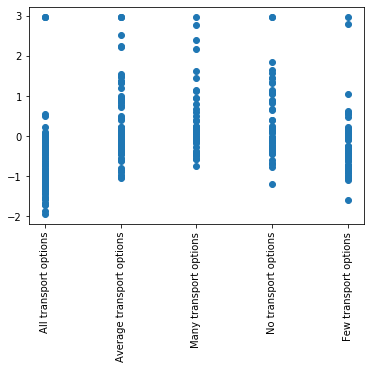

In [69]:
# Scatter plot for transport_availability vs normalised_sales
plt.scatter(df_train['transport_availability'], df_train['normalised_sales'])
plt.xticks(rotation=90)

In [70]:
print(df_train[(df_train['transport_availability']=='All transport options')&(df_train['normalised_sales']>0)].shape[0])
print(df_train[(df_train['transport_availability']=='All transport options')&(df_train['normalised_sales']<0)].shape[0])

11
73


* Wherever all transport options are available, sales are comparatively less. This might be due to people are open to buy from range of other options in neighbourhood and also can travel far.
* transport_availability == 'All transport options' -> less sales

#### new_store

In [71]:
df_train['new_store'].unique()

array(['no', 'yes'], dtype=object)

([0, 1], <a list of 2 Text xticklabel objects>)

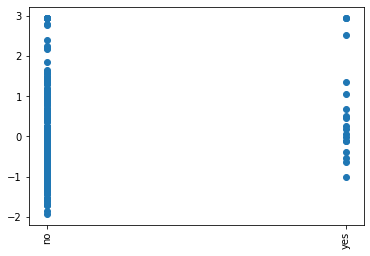

In [72]:
# Scatter plot for new_store vs normalised_sales
plt.scatter(df_train['new_store'], df_train['normalised_sales'])
plt.xticks(rotation=90)

* Can't infer much from new_store

### Correlation

#### How to check Correlation ?

<img src="images/correlation_coefficient_ranges.png" style="width:400px;height:200px;">

In [73]:
df_train.corrwith(df_train['normalised_sales'], method='spearman')

location_id              0.033191
crime_rate              -0.544635
proportion_flats         0.442421
proportion_nonretail    -0.585598
commercial_property     -0.551304
household_size           0.640708
proportion_newbuilds     0.562365
public_transport_dist    0.455938
property_value          -0.545545
school_proximity        -0.527445
competitor_density       0.145374
household_affluency     -0.862069
normalised_sales         1.000000
dtype: float64

In [74]:
# Calculate correlation for categorical variables

# transport_availability
cat_corr_ta = df_train['transport_availability']
target_corr_ta = df_train['normalised_sales']
# calculate spearman's correlation
spearman_corr_ta, spearman_p_value_ta = stats.spearmanr(cat_corr_ta, target_corr_ta)
print('Spearmans correlation for transport_availability: %.3f' % spearman_corr_ta)

print('--'*10)

# new_store
cat_corr_ns = df_train['new_store']
target_corr_ns = df_train['normalised_sales']
# calculate spearman's correlation
spearman_corr_ns, spearman_p_value_ns = stats.spearmanr(cat_corr_ns, target_corr_ns)
print('Spearmans correlation for new_store: %.3f' % spearman_corr_ns)

Spearmans correlation for transport_availability: 0.410
--------------------
Spearmans correlation for new_store: 0.150


In [75]:
# Make correlation table according to spearman's correlation
corr_spearman = df_train.corr(method='spearman')
corr_spearman

,location_id,crime_rate,proportion_flats,proportion_nonretail,commercial_property,household_size,proportion_newbuilds,public_transport_dist,property_value,school_proximity,competitor_density,household_affluency,normalised_sales
location_id,1.000000,0.059217,0.034777,0.014352,0.013486,-0.089724,-0.013735,0.013116,-0.010885,0.033098,0.041796,-0.018575,0.033191
crime_rate,0.059217,1.000000,-0.557760,0.715565,0.778972,-0.366867,-0.683726,-0.712519,0.735036,0.466495,-0.328003,0.639582,-0.544635
proportion_flats,0.034777,-0.557760,1.000000,-0.632607,-0.627201,0.392842,0.550161,0.611126,-0.370163,-0.451474,0.157396,-0.481914,0.442421
proportion_nonretail,0.014352,0.715565,-0.632607,1.000000,0.755609,-0.472959,-0.678848,-0.747333,0.657744,0.500084,-0.285102,0.649109,-0.585598
commercial_property,0.013486,0.778972,-0.627201,0.755609,1.000000,-0.348731,-0.788265,-0.857098,0.639597,0.398656,-0.276851,0.611597,-0.551304
household_size,-0.089724,-0.366867,0.392842,-0.472959,-0.348731,1.000000,0.300883,0.329498,-0.317695,-0.262653,0.049239,-0.649642,0.640708
proportion_newbuilds,-0.013735,-0.683726,0.550161,-0.678848,-0.788265,0.300883,1.000000,0.822194,-0.535408,-0.426853,0.210299,-0.655702,0.562365
public_transport_dist,0.013116,-0.712519,0.611126,-0.747333,-0.857098,0.329498,0.822194,1.000000,-0.557167,-0.373953,0.225864,-0.580426,0.455938
property_value,-0.010885,0.735036,-0.370163,0.657744,0.639597,-0.317695,-0.535408,-0.557167,1.000000,0.474167,-0.287474,0.535693,-0.545545
school_proximity,0.033098,0.466495,-0.451474,0.500084,0.398656,-0.262653,-0.426853,-0.373953,0.474167,1.000000,-0.072226,0.435506,-0.527445


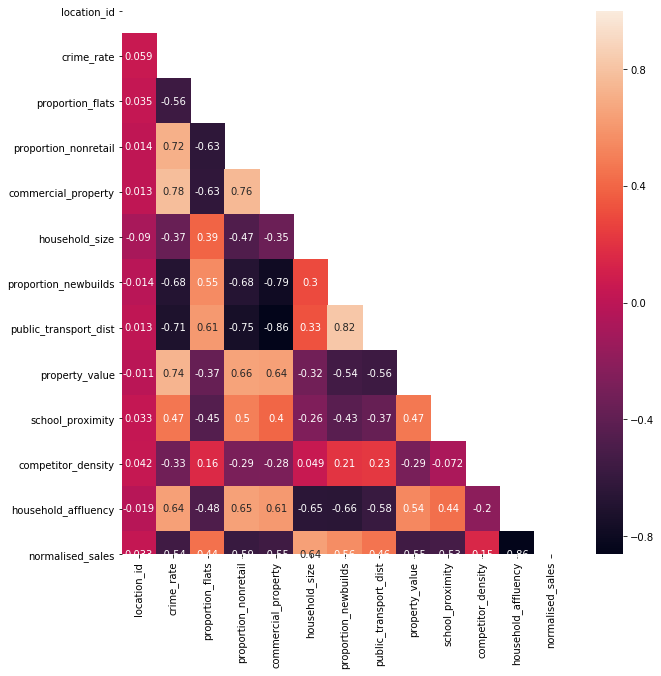

In [76]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_spearman, dtype=np.bool))

# Visualisation of heatmap matrix
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_spearman, mask=mask, annot = True)

## 4. Data Preprocessing

<img src="images/Data_Preprocessing_1.png" style="width:600px;height:400px;">

<img src="images/Data_Preprocessing_2.png" style="width:800px;height:400px;">

### Imputation

(array([288.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([   1.75 ,  102.475,  203.2  ,  303.925,  404.65 ,  505.375,
         606.1  ,  706.825,  807.55 ,  908.275, 1009.   ]),
 <a list of 10 Patch objects>)

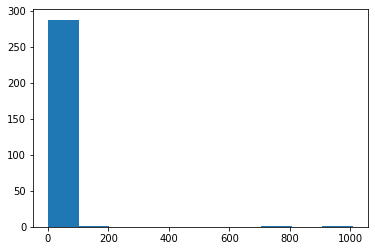

In [77]:
# Histogram
plt.hist(df_train['commercial_property'])

(array([ 7.,  0., 25., 10., 16., 29., 33., 21., 87., 29.]),
 array([13.  , 13.82, 14.64, 15.46, 16.28, 17.1 , 17.92, 18.74, 19.56,
        20.38, 21.2 ]),
 <a list of 10 Patch objects>)

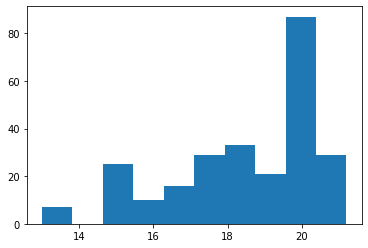

In [78]:
# Histogram
plt.hist(df_train['school_proximity'])

In [79]:
print(df_train['commercial_property'].mean())
print(df_train['school_proximity'].mean())

16.86855670103091
18.58949416342409


* After seeing the value distribution  and mean of each feature, it makes sense to impute with mean for respective feature.

### Feature Engineering

* Feature Normalisation
* New Feature Creation
* ...

In [80]:
# Make a copy of raw training set before imputing it
df_train_impute = df_train.copy()

In [81]:
# Rechecking if there is any null values still present
df_train_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
location_id               320 non-null int64
crime_rate                320 non-null float64
proportion_flats          320 non-null float64
proportion_nonretail      320 non-null float64
new_store                 320 non-null object
commercial_property       291 non-null float64
household_size            320 non-null float64
proportion_newbuilds      320 non-null float64
public_transport_dist     320 non-null float64
transport_availability    320 non-null object
property_value            320 non-null int64
school_proximity          257 non-null float64
competitor_density        320 non-null float64
household_affluency       320 non-null float64
normalised_sales          320 non-null float64
county                    320 non-null object
dtypes: float64(11), int64(2), object(3)
memory usage: 40.1+ KB


In [82]:
df_train_impute['commercial_property'] = df_train_impute['commercial_property'].fillna(df_train_impute['commercial_property'].mean())
df_train_impute['school_proximity'] = df_train_impute['school_proximity'].fillna(df_train_impute['school_proximity'].mean())


In [83]:
# Rechecking if there is any null values still present
df_train_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 16 columns):
location_id               320 non-null int64
crime_rate                320 non-null float64
proportion_flats          320 non-null float64
proportion_nonretail      320 non-null float64
new_store                 320 non-null object
commercial_property       320 non-null float64
household_size            320 non-null float64
proportion_newbuilds      320 non-null float64
public_transport_dist     320 non-null float64
transport_availability    320 non-null object
property_value            320 non-null int64
school_proximity          320 non-null float64
competitor_density        320 non-null float64
household_affluency       320 non-null float64
normalised_sales          320 non-null float64
county                    320 non-null object
dtypes: float64(11), int64(2), object(3)
memory usage: 40.1+ KB


### Categorical Encoding

##### Below encoding methods can be applied.
1. Label Encoding
2. One-Hot Encoding
3. Custome Binary Encoding
4. Polynomial Encoder

For 'new_store', 'transport_availability' and 'county' features we can simply impute with *Label Enconding*.

In [84]:
# Copying the dataset before encoding the categorical features
df_train_cat_enc = df_train_impute.copy()

In [85]:
from sklearn.preprocessing import LabelEncoder;

encoder = LabelEncoder();

In [86]:
# Need to convert the datatypes of the features to 'category' before Label encoding.
df_train_cat_enc["new_store"]=encoder.fit_transform(df_train_cat_enc['new_store'])
df_train_cat_enc["transport_availability"]=encoder.fit_transform(df_train_cat_enc['transport_availability'])
df_train_cat_enc["county"]=encoder.fit_transform(df_train_cat_enc['county'])

In [87]:
df_train_cat_enc.head(3)

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,normalised_sales,county
0,464,17.600541,0.0,18.10,0,16.868557,2.926,29.0,2.9084,0,666,20.2,368.74,4.5325,-0.399933,39
1,504,0.603556,20.0,3.97,0,14.850000,4.520,10.6,2.1398,1,264,13.0,388.37,1.8150,2.216308,80
2,295,0.606810,0.0,6.20,0,7.700000,2.981,31.9,3.6715,3,307,17.4,378.35,2.9125,0.166920,52


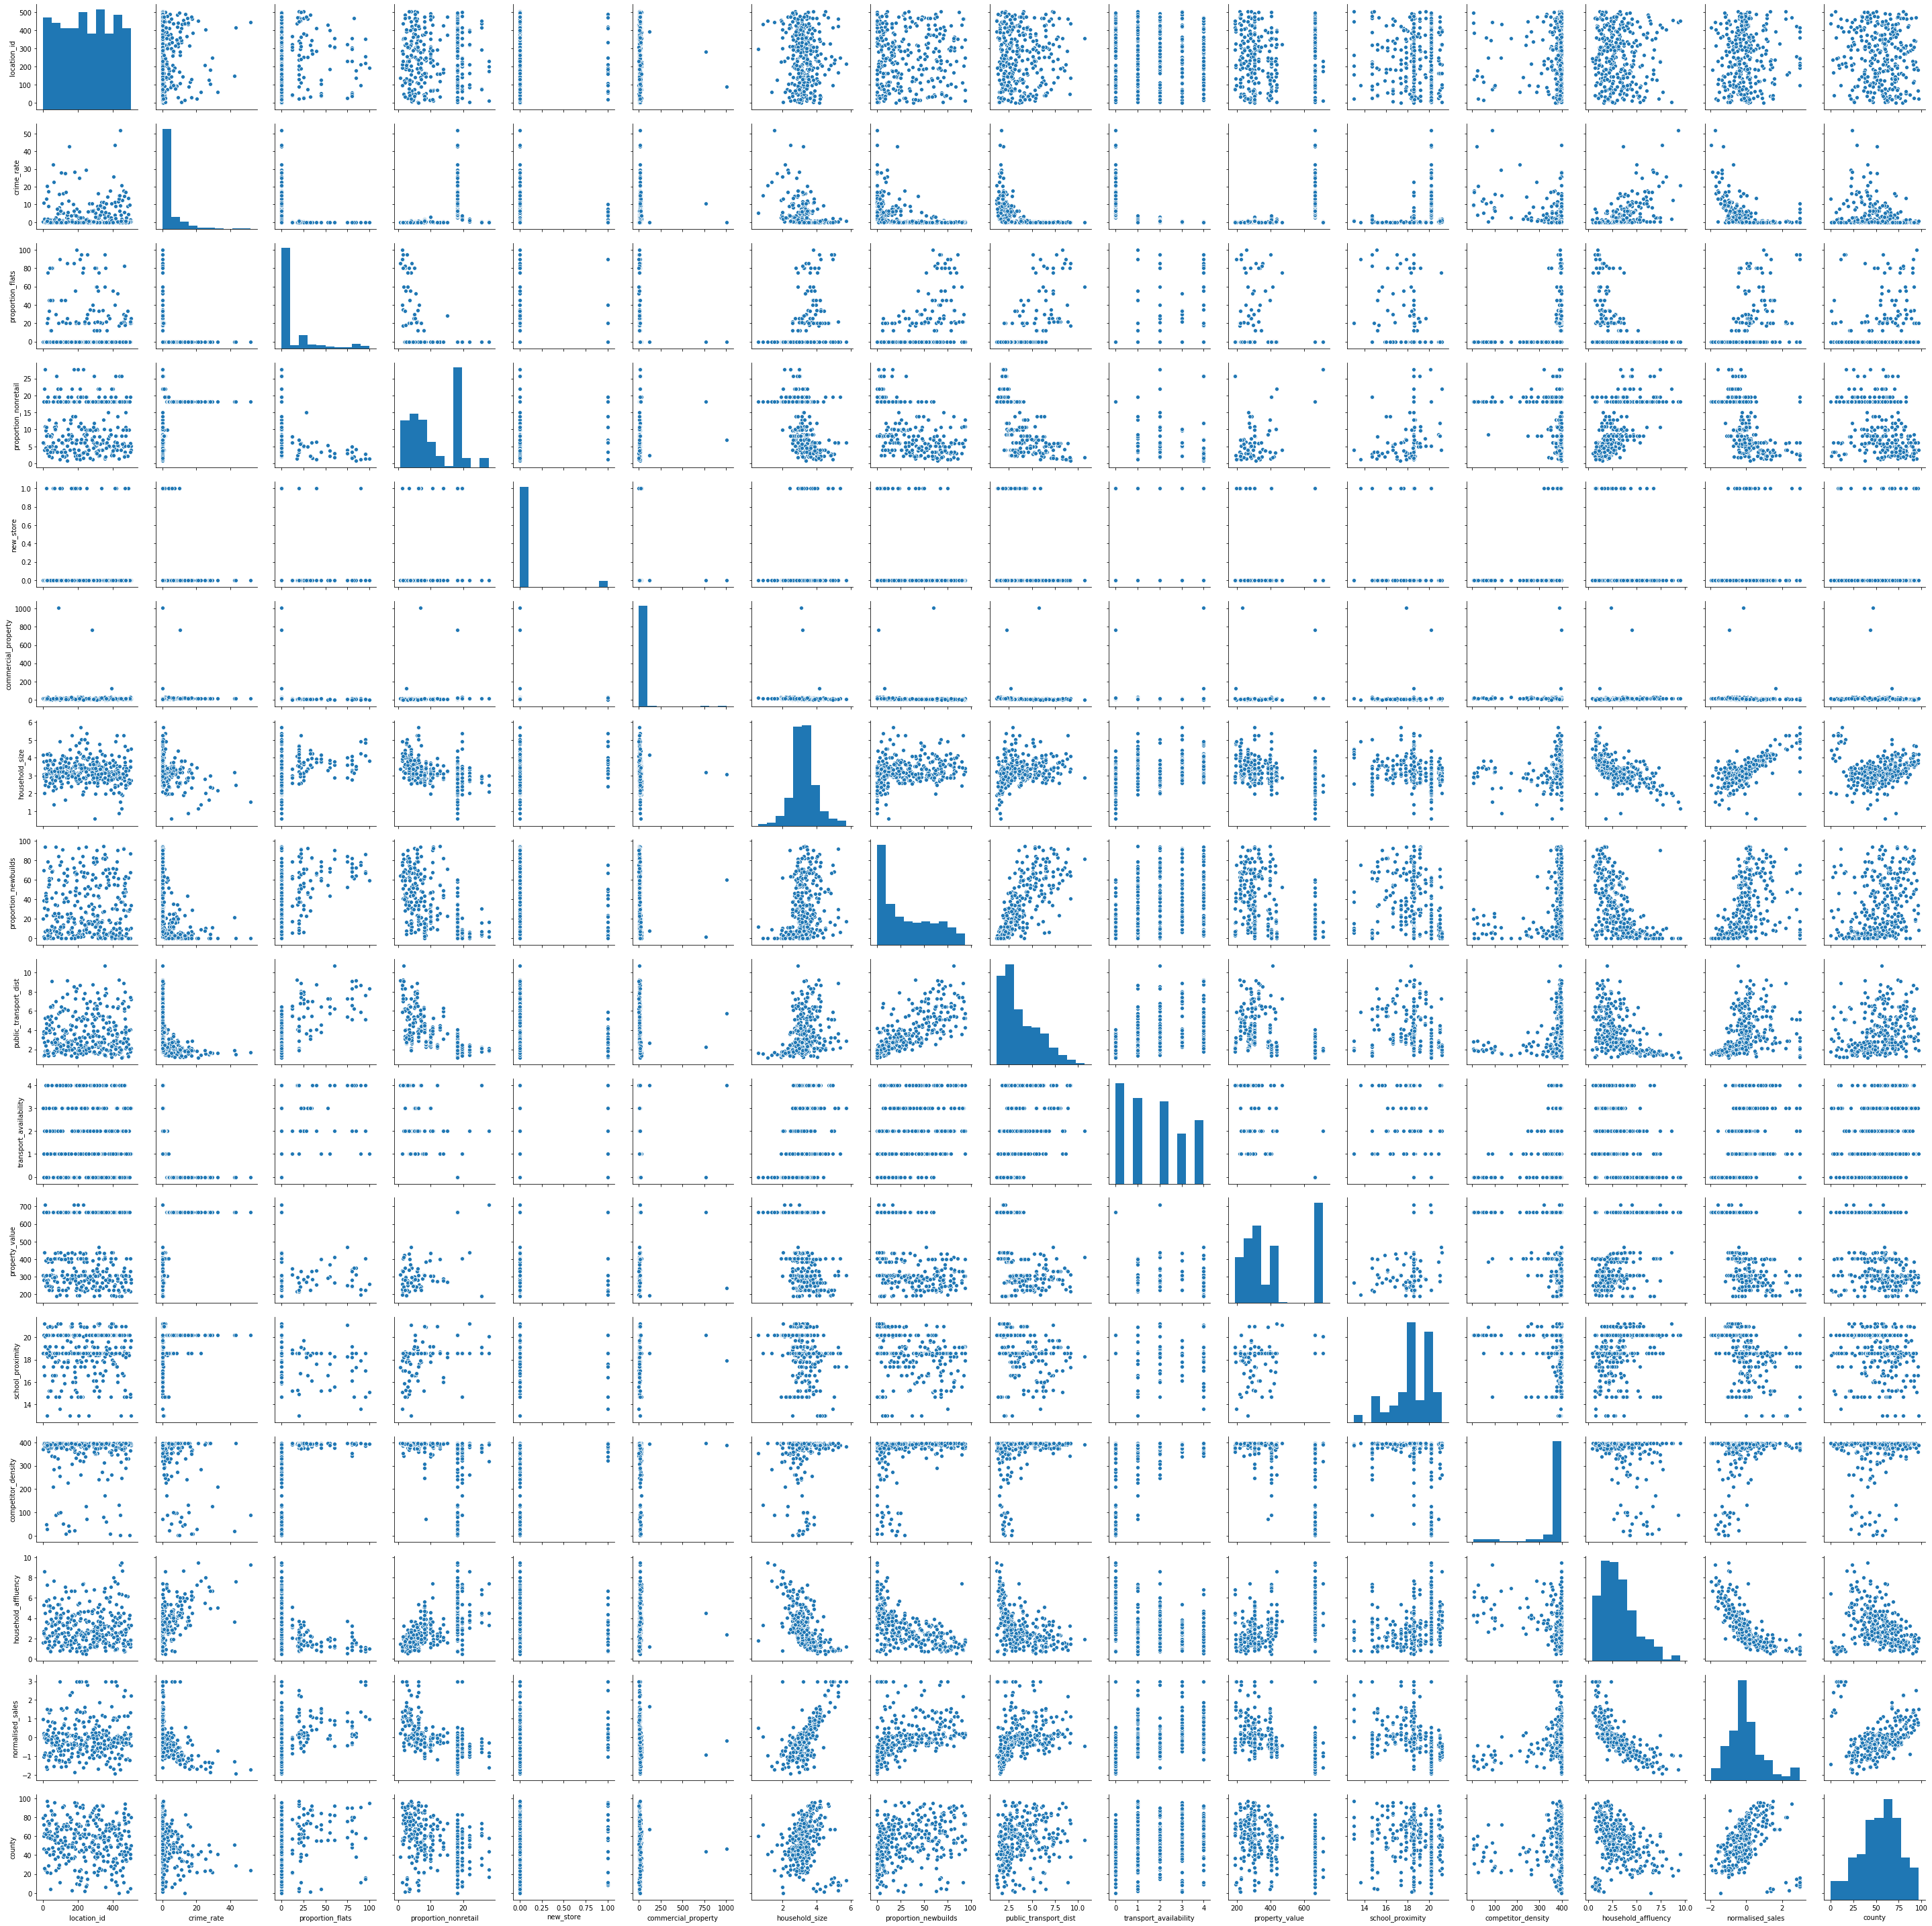

In [88]:
sns.pairplot(df_train_cat_enc)

**We should treat the test data the same way we treated the training data**

In [89]:
# Make a copy of raw training set before imputing it
df_test_impute = df_test.copy()

df_test_impute['commercial_property'] = df_test_impute['commercial_property'].fillna(df_test_impute['commercial_property'].mean())
df_test_impute['school_proximity'] = df_test_impute['school_proximity'].fillna(df_test_impute['school_proximity'].mean())

# Copying the dataset before encoding the categorical features
df_test_cat_enc = df_test_impute.copy()

df_test_cat_enc["new_store"]=encoder.fit_transform(df_test_cat_enc['new_store'])
df_test_cat_enc["transport_availability"]=encoder.fit_transform(df_test_cat_enc['transport_availability'])
df_test_cat_enc["county"]=encoder.fit_transform(df_test_cat_enc['county'])

In [90]:
df_test_impute.head()

,location_id,crime_rate,proportion_flats,proportion_nonretail,new_store,commercial_property,household_size,proportion_newbuilds,public_transport_dist,transport_availability,property_value,school_proximity,competitor_density,household_affluency,county
0,105,0.039968,34.0,6.09,no,4.15,3.590,59.6,5.4917,Many transport options,329,16.100000,395.75,2.3750,c_42
1,400,0.587758,20.0,3.97,no,14.85,5.398,8.5,2.2885,Average transport options,264,13.000000,386.86,1.4775,c_140
2,338,1.116926,0.0,8.14,no,9.40,2.813,0.0,4.0952,Few transport options,307,17.772727,394.54,4.9700,c_55
3,227,1.517409,0.0,19.58,no,12.75,3.066,0.0,1.7573,Average transport options,403,14.700000,353.89,1.6075,c_62
4,114,83.093533,0.0,18.10,no,16.45,2.957,0.0,1.8026,All transport options,666,20.200000,16.45,5.1550,c_22


In [91]:
df_train_cat_enc = df_train_cat_enc.drop(['normalised_sales'], axis=1)

### Feature Selection

* There are certain techniques to select features for our model.
* We may consider features based on correlation, from our intuition of Exploratory Data Analysis
* ...
* Another method is feed all your features first into model and see which are being used in a tree split, then remove based on multivariate Gini results.

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [93]:
model.fit(df_train_cat_enc, df_train_impute['normalised_sales'])

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

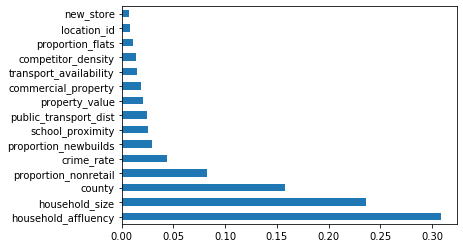

In [94]:
feature_importances = pd.Series(model.feature_importances_, index =  df_train_cat_enc.columns)
feature_importances.nlargest(15).plot(kind = 'barh')

In [95]:
from sklearn.linear_model import Lasso;
from sklearn.feature_selection import SelectFromModel;

In [96]:
select_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [97]:
select_model.fit(df_train_cat_enc, df_train_impute['normalised_sales'])

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [98]:
select_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [99]:
feature_selectModel = pd.DataFrame(select_model.get_support(), index =  df_train_cat_enc.columns,columns=['Should be added'])
feature_selectModel

,Should be added
location_id,True
crime_rate,True
proportion_flats,True
proportion_nonretail,True
new_store,True
commercial_property,True
household_size,True
proportion_newbuilds,True
public_transport_dist,True
transport_availability,True


### Model Dataset Preparation

**Training and Validation Data Preparation**

In [100]:
train_data = df_train_cat_enc
exog_train = train_data
endog_train = df_train_impute['normalised_sales']


In [101]:
# Insample train and validation split
# random_state parameter here is the seed
x_train, x_test, y_train, y_test = train_test_split(exog_train, endog_train, test_size=0.2, random_state=42)


**Test Data Preparation**

In [102]:
test_data = df_test_cat_enc
exog_test = test_data

## 5. Model Training

<img src="images/Training.png" style="width:600px;height:200px;">

* Random Forest Model

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [105]:
# Let's use a Random Forest Model

rf = RandomForestRegressor()

In [106]:
random_grid = {
    'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
}
print(random_grid)

{'n_estimators': [1, 10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [107]:
# Parameters used by the current forest

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [108]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error'
                               , n_iter = 150, cv = 5, verbose=2, random_state=42, n_jobs = 1)

* Base Model

In [109]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_dept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=28, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf

[CV]  n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=19, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=28, min_samples_split=10, min_samples_leaf=

[CV]  n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=64, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=91, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=91, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=91, min_samples_split=100, min_samples_

[CV]  n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=   0.3s
[CV] n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25 
[CV]  n_estimators=91, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=19, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=19, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=19, min_samples_split=100, min_samples_

[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=46, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=46, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.1s
[CV] n_estimators=46, min_samples_split=5, min_samples

[CV]  n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=55, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   0.1s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   0.0s
[CV] n_estimators=10, min_samples_split=10,

[CV]  n_estimators=28, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=28, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=28, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=19, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=19, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=19, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=19, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=19, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=19, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=20, total=   0.1s
[CV] n_estimators=19, min_samples_split=10, min_samp

[CV]  n_estimators=82, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=82, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=82, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.2s
[CV] n_estimators=91, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=91, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=91, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=91, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=91, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=91, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=91, min_samples_split=100, m

[CV]  n_estimators=55, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=37, min_samples_spl

[CV]  n_estimators=82, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.2s
[CV] n_estimators=73, min_samples_split=15, min_sample

[CV]  n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=73, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=10, min_samples_

[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=10, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.1s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=20, total=   0.2s
[CV] n_estimators=37, min_samples_split=5, 

[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=64, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.1s
[CV] n_estimators=19, min_samples_split=2, min_samples_leaf=5, max_fea

[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=46, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=46, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.1s
[CV] n_estimators=46, min_samples_split=15, m

[CV]  n_estimators=19, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.0s
[CV] n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=28, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=28, min_samples_split=5, min_samp

[CV]  n_estimators=46, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=100, 

[CV]  n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=37, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=1, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.0s
[CV] n_estimators=1, min_samples_split=5, min_samples_le

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  1.2min finished
C:\Users\stak\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [110]:
rf_random.best_params_

{'n_estimators': 37,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [111]:
base_accuracy = evaluate(rf_random, x_test, y_test)

Model Performance:
----------
----------
Accuracy = 97.60%
Error: 2.4%


## 7. Prediction

<img src="images/Scoring.png" style="width:600px;height:200px;">

In [112]:
# Predictions for test dataset
pred_test = pd.DataFrame(data=rf_random.predict(exog_test), columns=['y_pred'])


In [113]:
test_predictions = pd.DataFrame()
test_predictions['location_id'] = df_test_cat_enc['location_id']
test_predictions['normalised_sales_pred'] = pred_test['y_pred']
test_predictions

,location_id,normalised_sales_pred
0,105,0.770894
1,400,1.986503
2,338,0.649805
3,227,1.209586
4,114,-0.011327
5,203,0.558766
6,12,1.051079
7,199,1.442042
8,477,1.295615
9,341,1.203399


In [114]:
sorted_predictions = test_predictions.sort_values(by=['normalised_sales_pred'], ascending=False)
sorted_predictions

,location_id,normalised_sales_pred
11,148,2.315890
1,400,1.986503
7,199,1.442042
8,477,1.295615
3,227,1.209586
9,341,1.203399
6,12,1.051079
12,363,0.942364
0,105,0.770894
10,136,0.752038


The top 3 according to Location Id

1. 148
2. 400
3. 199

### Top 5 locations: Top 5 feature analysis

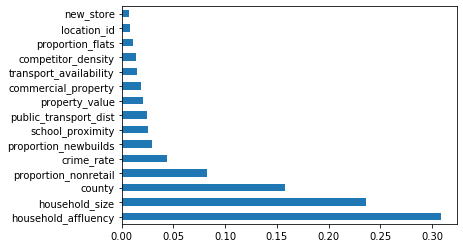

In [121]:
feature_importances.nlargest(15).plot(kind = 'barh')

In [119]:
df_test[df_test['location_id'].isin(['148','400','199','477','227'])][['location_id','household_size','household_affluency','public_transport_dist','crime_rate','proportion_newbuilds']].sort_values(by=['household_affluency','household_size'], ascending=False)

,location_id,household_size,household_affluency,public_transport_dist,crime_rate,proportion_newbuilds
7,199,2.875,2.2200,1.1296,9.341992,10.4
8,477,4.088,1.9625,7.3073,0.010238,79.2
3,227,3.066,1.6075,1.7573,1.517409,0.0
1,400,5.398,1.4775,2.2885,0.587758,8.5
11,148,5.337,0.6175,3.8384,0.650078,26.7


### Final Recommendation


## Top 3 Locations

1. 199
2. 477
3. 227

#### Thank You